In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

try:
    from google.colab import drive
    drive.mount('/content/drive')
    workding_dir = "/content/drive/MyDrive/logical-reasoning/"
except ModuleNotFoundError:
    workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/Library/CloudStorage/GoogleDrive-dh.huang.2023@smu.edu.sg/My Drive/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/Library/CloudStorage/GoogleDrive-dh.huang.2023@smu.edu.sg/My Drive/logical-reasoning/.env


True

In [5]:
import pandas as pd

df = pd.DataFrame(
    {
        "csv_file": [
            "results/mgtv-results_nv4080.csv",
            "results/mgtv-results_nv4080_r2.csv",
            "results/mgtv-results_t4.csv",
            "results/mgtv-results_t4_r2.csv",
            "results/mgtv-results_t4_r3.csv",
        ],
        "model_name": ["internlm/internlm2_5-7b-chat-1m"] * 5,
    }
)
df

csv_file                       model_name
0     results/mgtv-results_nv4080.csv  internlm/internlm2_5-7b-chat-1m
1  results/mgtv-results_nv4080_r2.csv  internlm/internlm2_5-7b-chat-1m
2         results/mgtv-results_t4.csv  internlm/internlm2_5-7b-chat-1m
3      results/mgtv-results_t4_r2.csv  internlm/internlm2_5-7b-chat-1m
4      results/mgtv-results_t4_r3.csv  internlm/internlm2_5-7b-chat-1m

In [6]:
P1 = """你是一个逻辑游戏的主持人。游戏规则如下：

1. 参与者会得到一个谜题。
2. 参与者可以通过提问来获取线索，尝试解开谜题。
3. 对于每个问题，主持人将根据实际情况回答以下五个选项之一：是、不是、不重要、回答正确、问法错误。
4. 回答中不能添加任何其它信息，也不能省略选项中的任何一个字。例如，不可以把“不是”省略成“不”。
5. 参与者需要根据回答来推理，并最终找出谜题的正确答案。

请严格按照这些规则回答参与者提出的问题。

谜题: {}

实际情况: {}

参与者提出的问题: {}
"""

In [7]:
P2 = """你是一个情景猜谜游戏的主持人。游戏规则如下：

1. 参与者会得到一个谜面，谜面会描述一个简单又难以理解的事件。
2. 主持人知道谜底，谜底是谜面的答案。
3. 参与者可以询问任何封闭式问题来找寻事件的真相。
4. 对于每个问题，主持人将根据实际情况回答以下五个选项之一：是、不是、不重要、回答正确、问法错误。各回答的判断标准如下：
   - 若谜面和谜底能找到问题的答案，回答：是或者不是
   - 若谜面和谜底不能直接或者间接推断出问题的答案，回答：不重要
   - 若参与者提问不是一个封闭式问题或者问题难以理解，回答：问法错误
   - 若参与者提问基本还原了谜底真相，回答：回答正确
5. 回答中不能添加任何其它信息，也不能省略选项中的任何一个字。例如，不可以把“不是”省略成“不”。

请严格按照这些规则回答参与者提出的问题。

**谜面:** {}

**谜底:** {}

**参与者提出的问题:** {}
"""

In [8]:
df["run"] = df["model_name"].apply(lambda x: x.split("/")[-1])
df["run"] = (
    df["run"]
    + "\n("
    + [
        "RTX 4080,4bit,P1",
        "RTX 4080,bf16,P1",
        "Tesla T4,4bit,P1",
        "Tesla T4,bf16,P1",
        "Tesla T4,bf16,P2",
    ]
    + ")"
)
df

csv_file                       model_name  \
0     results/mgtv-results_nv4080.csv  internlm/internlm2_5-7b-chat-1m   
1  results/mgtv-results_nv4080_r2.csv  internlm/internlm2_5-7b-chat-1m   
2         results/mgtv-results_t4.csv  internlm/internlm2_5-7b-chat-1m   
3      results/mgtv-results_t4_r2.csv  internlm/internlm2_5-7b-chat-1m   
4      results/mgtv-results_t4_r3.csv  internlm/internlm2_5-7b-chat-1m   

                                          run  
0  internlm2_5-7b-chat-1m\n(RTX 4080,4bit,P1)  
1  internlm2_5-7b-chat-1m\n(RTX 4080,bf16,P1)  
2  internlm2_5-7b-chat-1m\n(Tesla T4,4bit,P1)  
3  internlm2_5-7b-chat-1m\n(Tesla T4,bf16,P1)  
4  internlm2_5-7b-chat-1m\n(Tesla T4,bf16,P2)

In [9]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

def plot_value_counts(df, column):
    font_family = rcParams["font.family"]
    # Set the font to SimHei to support Chinese characters
    rcParams["font.family"] = "STHeiti"
    rcParams["axes.unicode_minus"] = False  # This is to support the minus sign in Chinese.

    plt.figure(figsize=(12, 6))
    df[column].value_counts().plot(kind="bar")
    # add values on top of bars
    for i, v in enumerate(df[column].value_counts()):
        plt.text(i, v + 0.1, str(v), ha="center")
    plt.show()
    
    rcParams["font.family"] = font_family


********** internlm2_5-7b-chat-1m
(RTX 4080,4bit,P1) **********
results/mgtv-results_nv4080.csv
internlm/internlm2_5-7b-chat-1m
不是      1997
是        979
不重要       19
不重要。       5
Name: count, dtype: int64


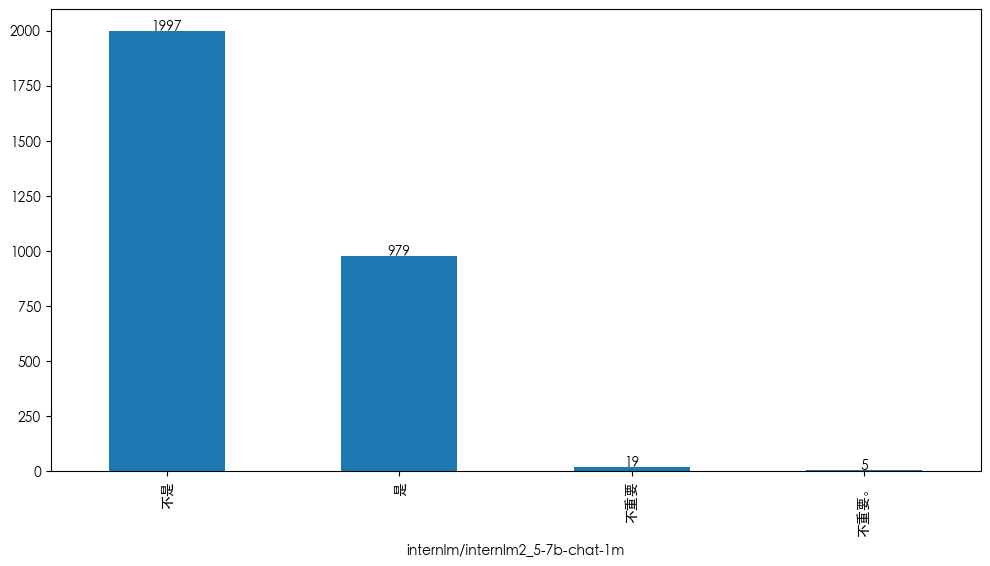

********** internlm2_5-7b-chat-1m
(RTX 4080,bf16,P1) **********
results/mgtv-results_nv4080_r2.csv
internlm/internlm2_5-7b-chat-1m
不是      1670
是       1283
不重要       43
不重要。       3
是男孩。       1
Name: count, dtype: int64


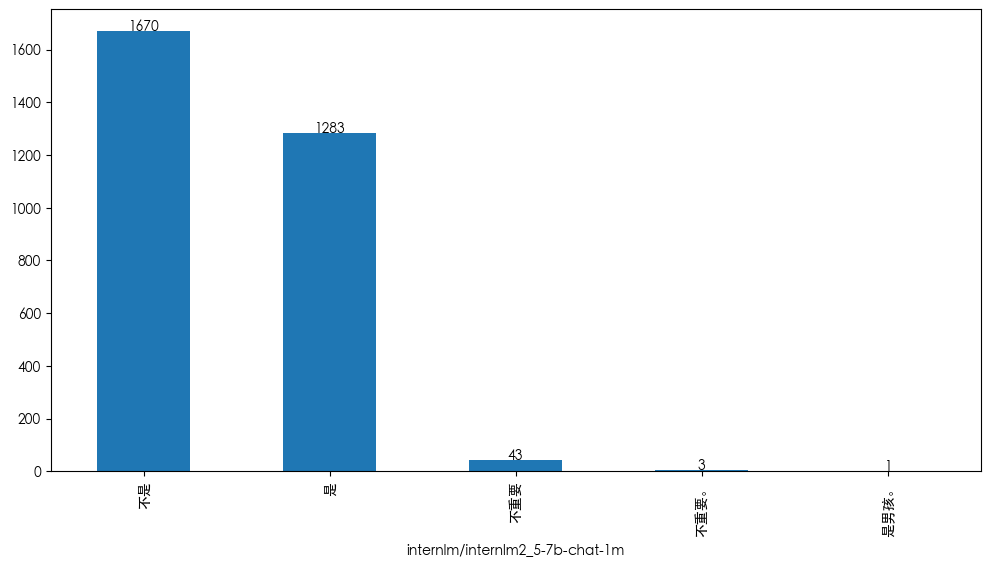

********** internlm2_5-7b-chat-1m
(Tesla T4,4bit,P1) **********
results/mgtv-results_t4.csv
internlm/internlm2_5-7b-chat-1m
不是      1967
是       1007
不重要       22
不重要。       3
回答：是       1
Name: count, dtype: int64


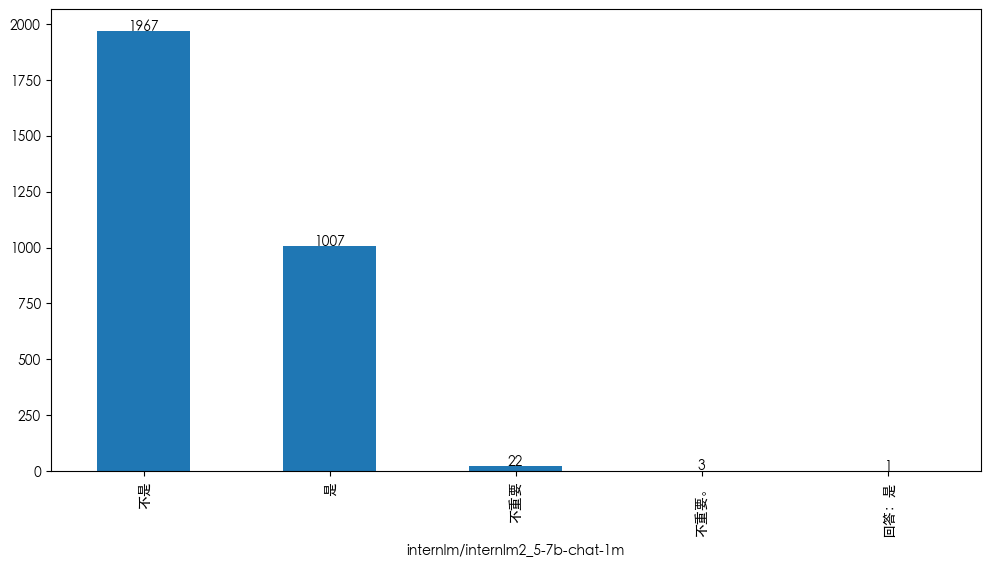

********** internlm2_5-7b-chat-1m
(Tesla T4,bf16,P1) **********
results/mgtv-results_t4_r2.csv
internlm/internlm2_5-7b-chat-1m
不是       1660
是        1289
不重要        46
不重要。        3
是男孩。        1
回答: 是       1
Name: count, dtype: int64


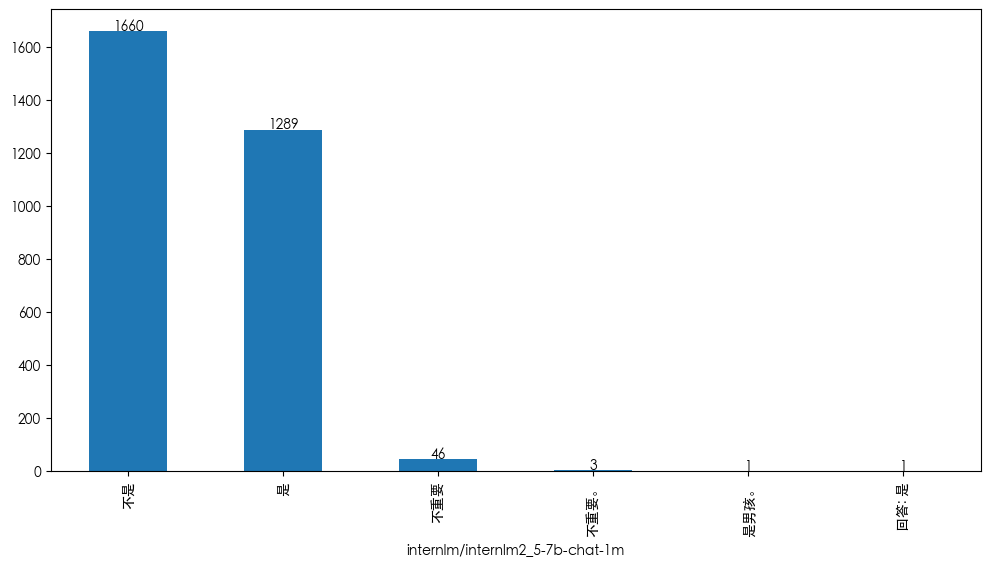

********** internlm2_5-7b-chat-1m
(Tesla T4,bf16,P2) **********
results/mgtv-results_t4_r3.csv
internlm/internlm2_5-7b-chat-1m
是       1358
不重要     1169
不是       472
问法错误       1
Name: count, dtype: int64


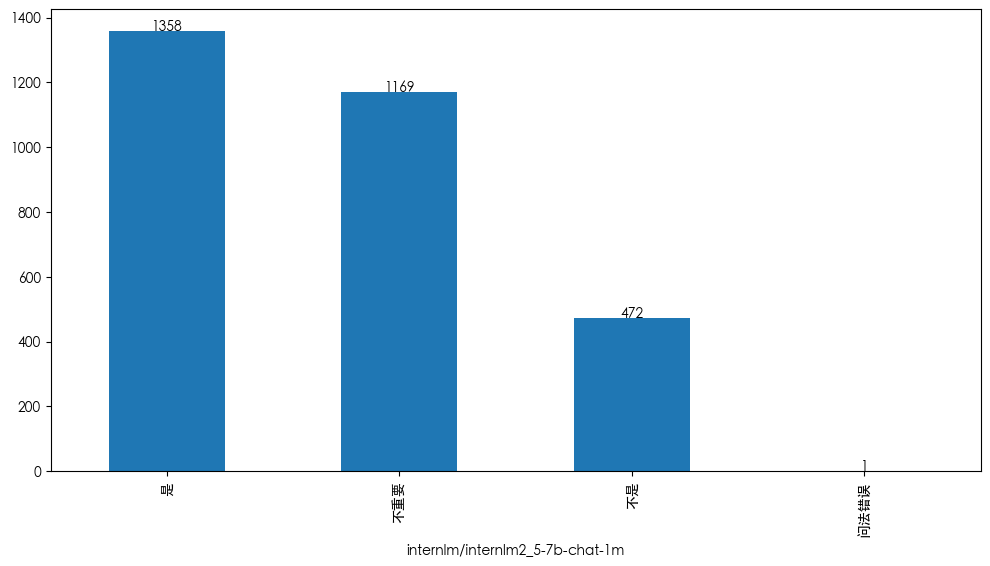

In [10]:
for row in df.itertuples():
    df2 = pd.read_csv(row.csv_file)
    print("*" * 10, row.run, "*" * 10)
    print(row.csv_file)
    print(df2[row.model_name].value_counts())
    plot_value_counts(df2, row.model_name)

In [11]:
import re


def clean_up(df, model_name):
    df[model_name] = df[model_name].apply(
        lambda x: re.sub(r"回答.*是", "是", x)
        .replace("是男孩", "是")
        .replace("。", "")
        .strip()
    )
    return df

********** internlm2_5-7b-chat-1m
(RTX 4080,4bit,P1) **********
results/mgtv-results_nv4080.csv
internlm/internlm2_5-7b-chat-1m
不是     1997
是       979
不重要      24
Name: count, dtype: int64


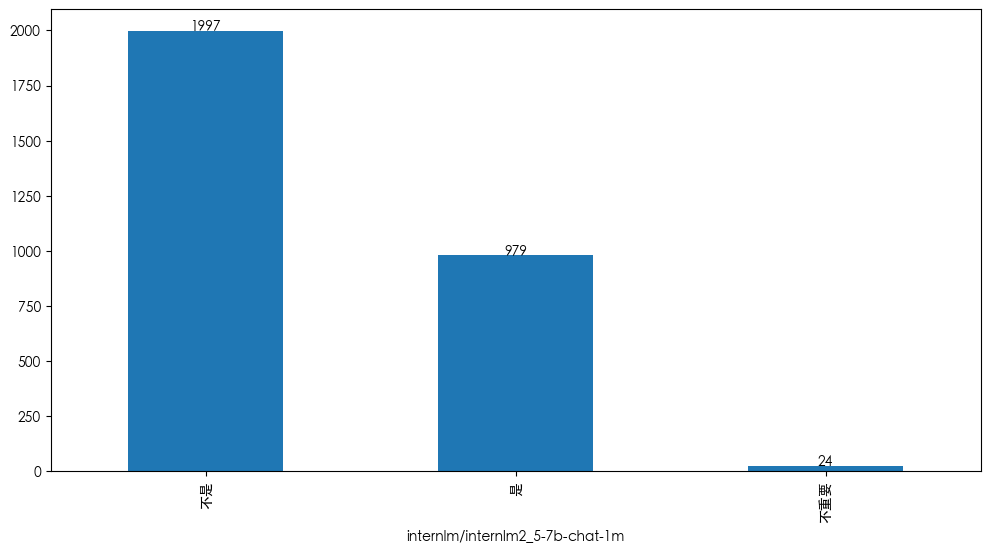

********** internlm2_5-7b-chat-1m
(RTX 4080,bf16,P1) **********
results/mgtv-results_nv4080_r2.csv
internlm/internlm2_5-7b-chat-1m
不是     1670
是      1284
不重要      46
Name: count, dtype: int64


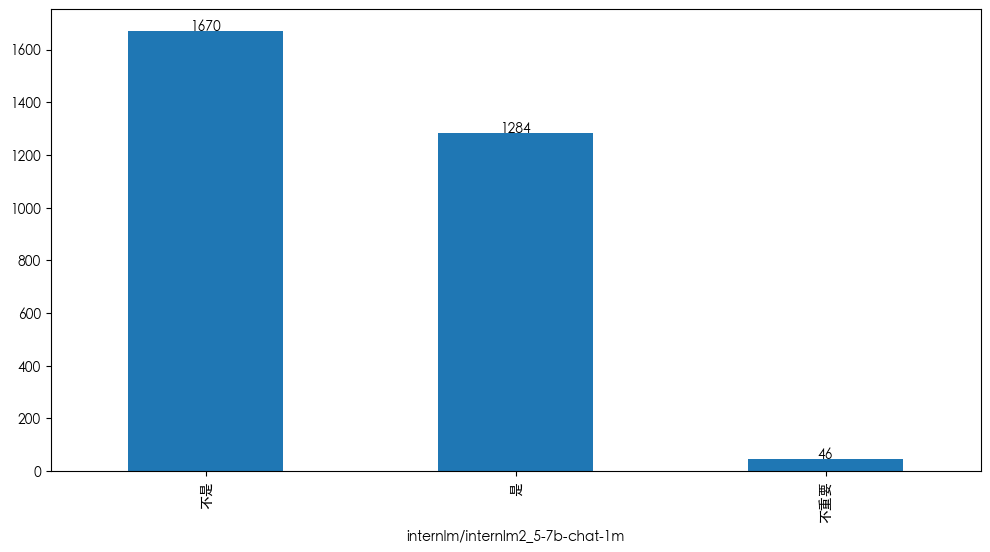

********** internlm2_5-7b-chat-1m
(Tesla T4,4bit,P1) **********
results/mgtv-results_t4.csv
internlm/internlm2_5-7b-chat-1m
不是     1967
是      1008
不重要      25
Name: count, dtype: int64


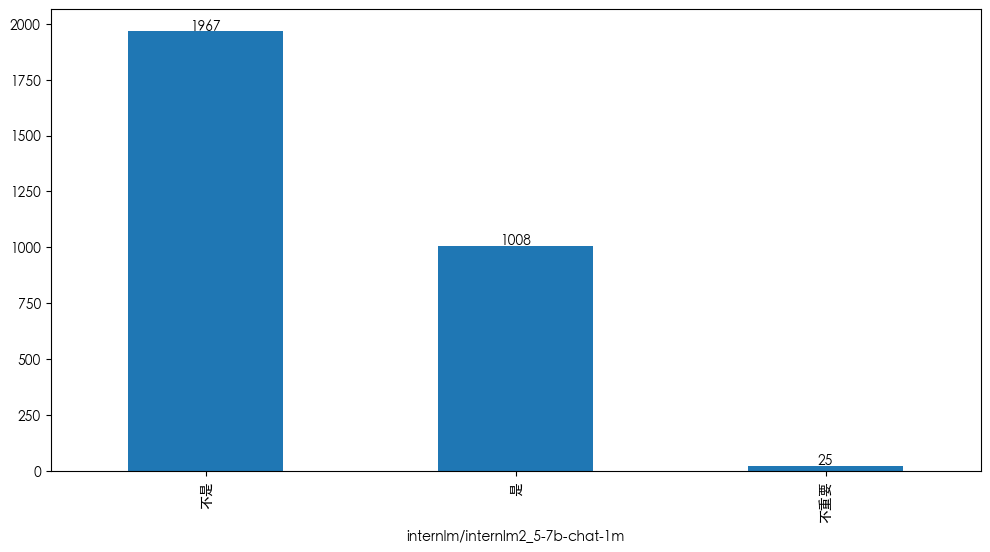

********** internlm2_5-7b-chat-1m
(Tesla T4,bf16,P1) **********
results/mgtv-results_t4_r2.csv
internlm/internlm2_5-7b-chat-1m
不是     1660
是      1291
不重要      49
Name: count, dtype: int64


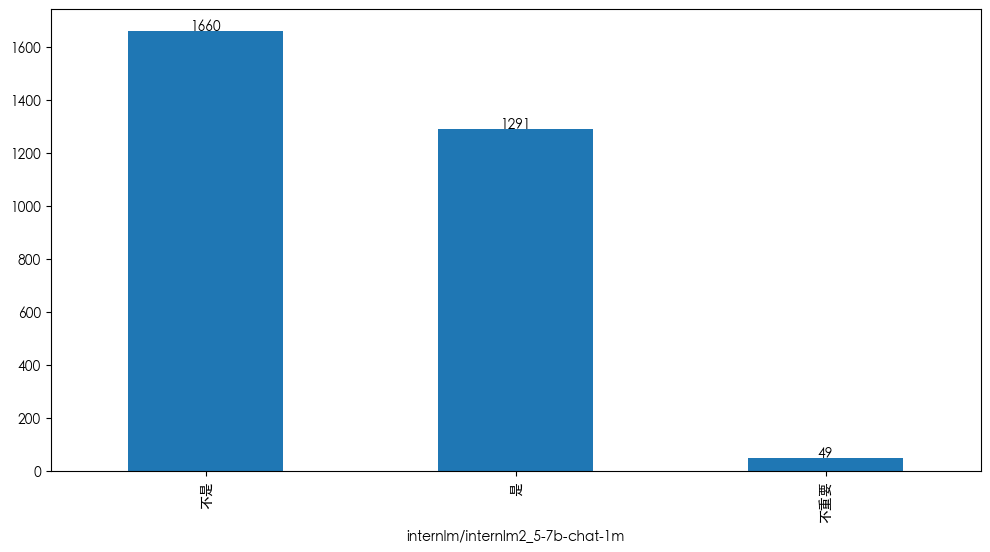

********** internlm2_5-7b-chat-1m
(Tesla T4,bf16,P2) **********
results/mgtv-results_t4_r3.csv
internlm/internlm2_5-7b-chat-1m
是       1358
不重要     1169
不是       472
问法错误       1
Name: count, dtype: int64


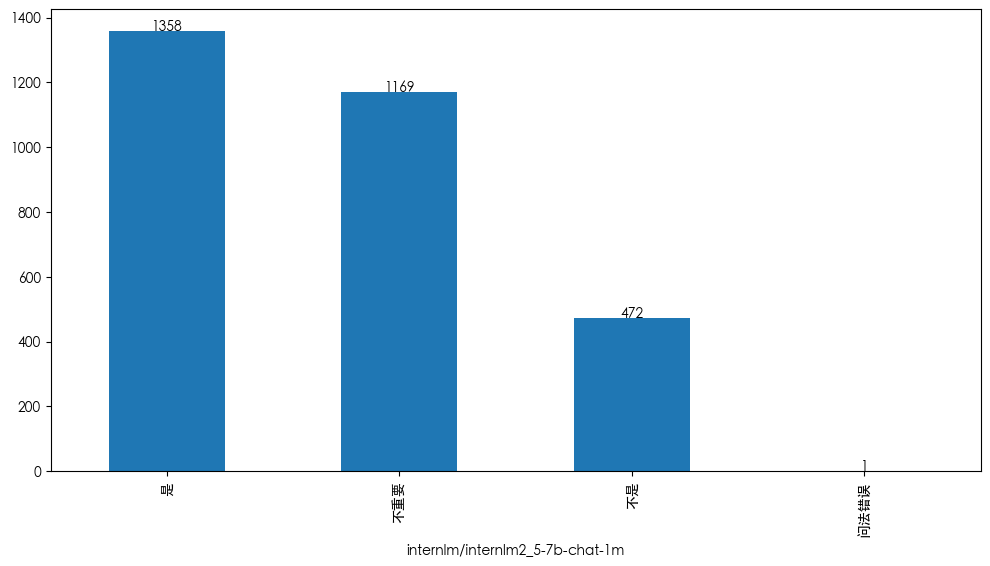

In [12]:
for row in df.itertuples():
    df2 = pd.read_csv(row.csv_file)
    df2 = clean_up(df2, row.model_name)
    print("*" * 10, row.run, "*" * 10)
    print(row.csv_file)
    print(df2[row.model_name].value_counts())
    plot_value_counts(df2, row.model_name)

In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def calc_metrics_for_csv(csv_file, model_name):
    df = pd.read_csv(csv_file)
    df = clean_up(df, model_name)

    y_true = df["label"]
    y_pred = df[model_name]

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted", labels=np.unique(y_pred))
    recall = recall_score(y_true, y_pred, average="weighted", labels=np.unique(y_pred))
    f1 = f1_score(y_true, y_pred, average="weighted", labels=np.unique(y_pred))

    return accuracy, float(precision), float(recall), float(f1)

In [17]:
df["accuracy"], df["precision"], df["recall"], df["f1"] = zip(
    *df.apply(lambda x: calc_metrics_for_csv(x["csv_file"], x["model_name"]), axis=1)
)
df

csv_file                       model_name  \
0     results/mgtv-results_nv4080.csv  internlm/internlm2_5-7b-chat-1m   
1  results/mgtv-results_nv4080_r2.csv  internlm/internlm2_5-7b-chat-1m   
2         results/mgtv-results_t4.csv  internlm/internlm2_5-7b-chat-1m   
3      results/mgtv-results_t4_r2.csv  internlm/internlm2_5-7b-chat-1m   
4      results/mgtv-results_t4_r3.csv  internlm/internlm2_5-7b-chat-1m   

                                          run  accuracy  precision    recall  \
0  internlm2_5-7b-chat-1m\n(RTX 4080,4bit,P1)  0.740333   0.731676  0.761138   
1  internlm2_5-7b-chat-1m\n(RTX 4080,bf16,P1)  0.759667   0.741854  0.781014   
2  internlm2_5-7b-chat-1m\n(Tesla T4,4bit,P1)  0.746667   0.737058  0.767649   
3  internlm2_5-7b-chat-1m\n(Tesla T4,bf16,P1)  0.760000   0.742271  0.781357   
4  internlm2_5-7b-chat-1m\n(Tesla T4,bf16,P2)  0.509333   0.748183  0.515346   

         f1  
0  0.731746  
1  0.758887  
2  0.739094  
3  0.759572  
4  0.540619

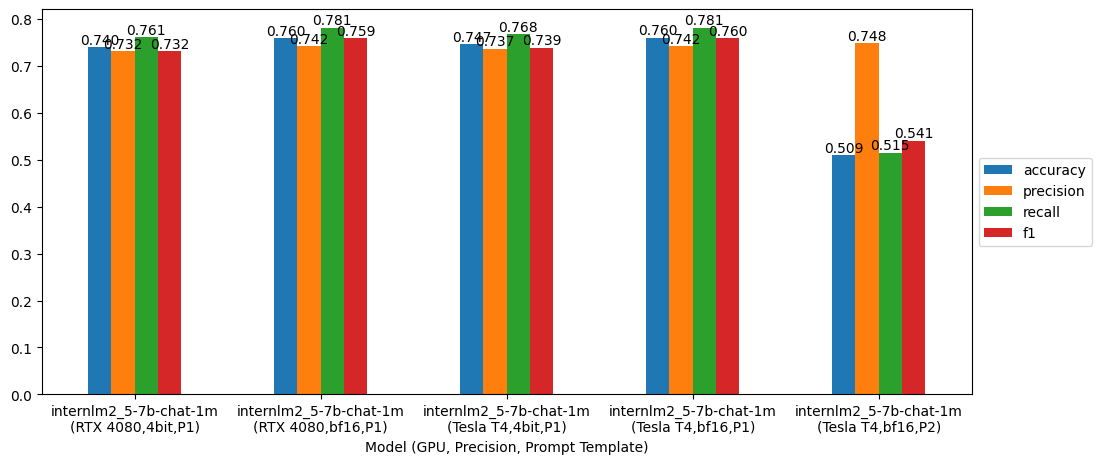

In [18]:
# plot metrics for each model
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 5))

df.plot(x="run", y=["accuracy", "precision", "recall", "f1"], kind="bar", ax=ax)

# add values on top of bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.3f}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
    )

# add title and labels
# ax.set_title("Metrics for different settings")
# ax.set_ylabel("Value")
ax.set_xlabel("Model (GPU, Precision, Prompt Template)")
# rotate x labels
plt.xticks(rotation=0)

# set legend at the right to avoid overlapping with bars
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
# plt.tight_layout()

plt.show()